##Assignment 4: Hidden Markov Models##
###Predicting Weather Patterns###
<p>Henry Loughlin</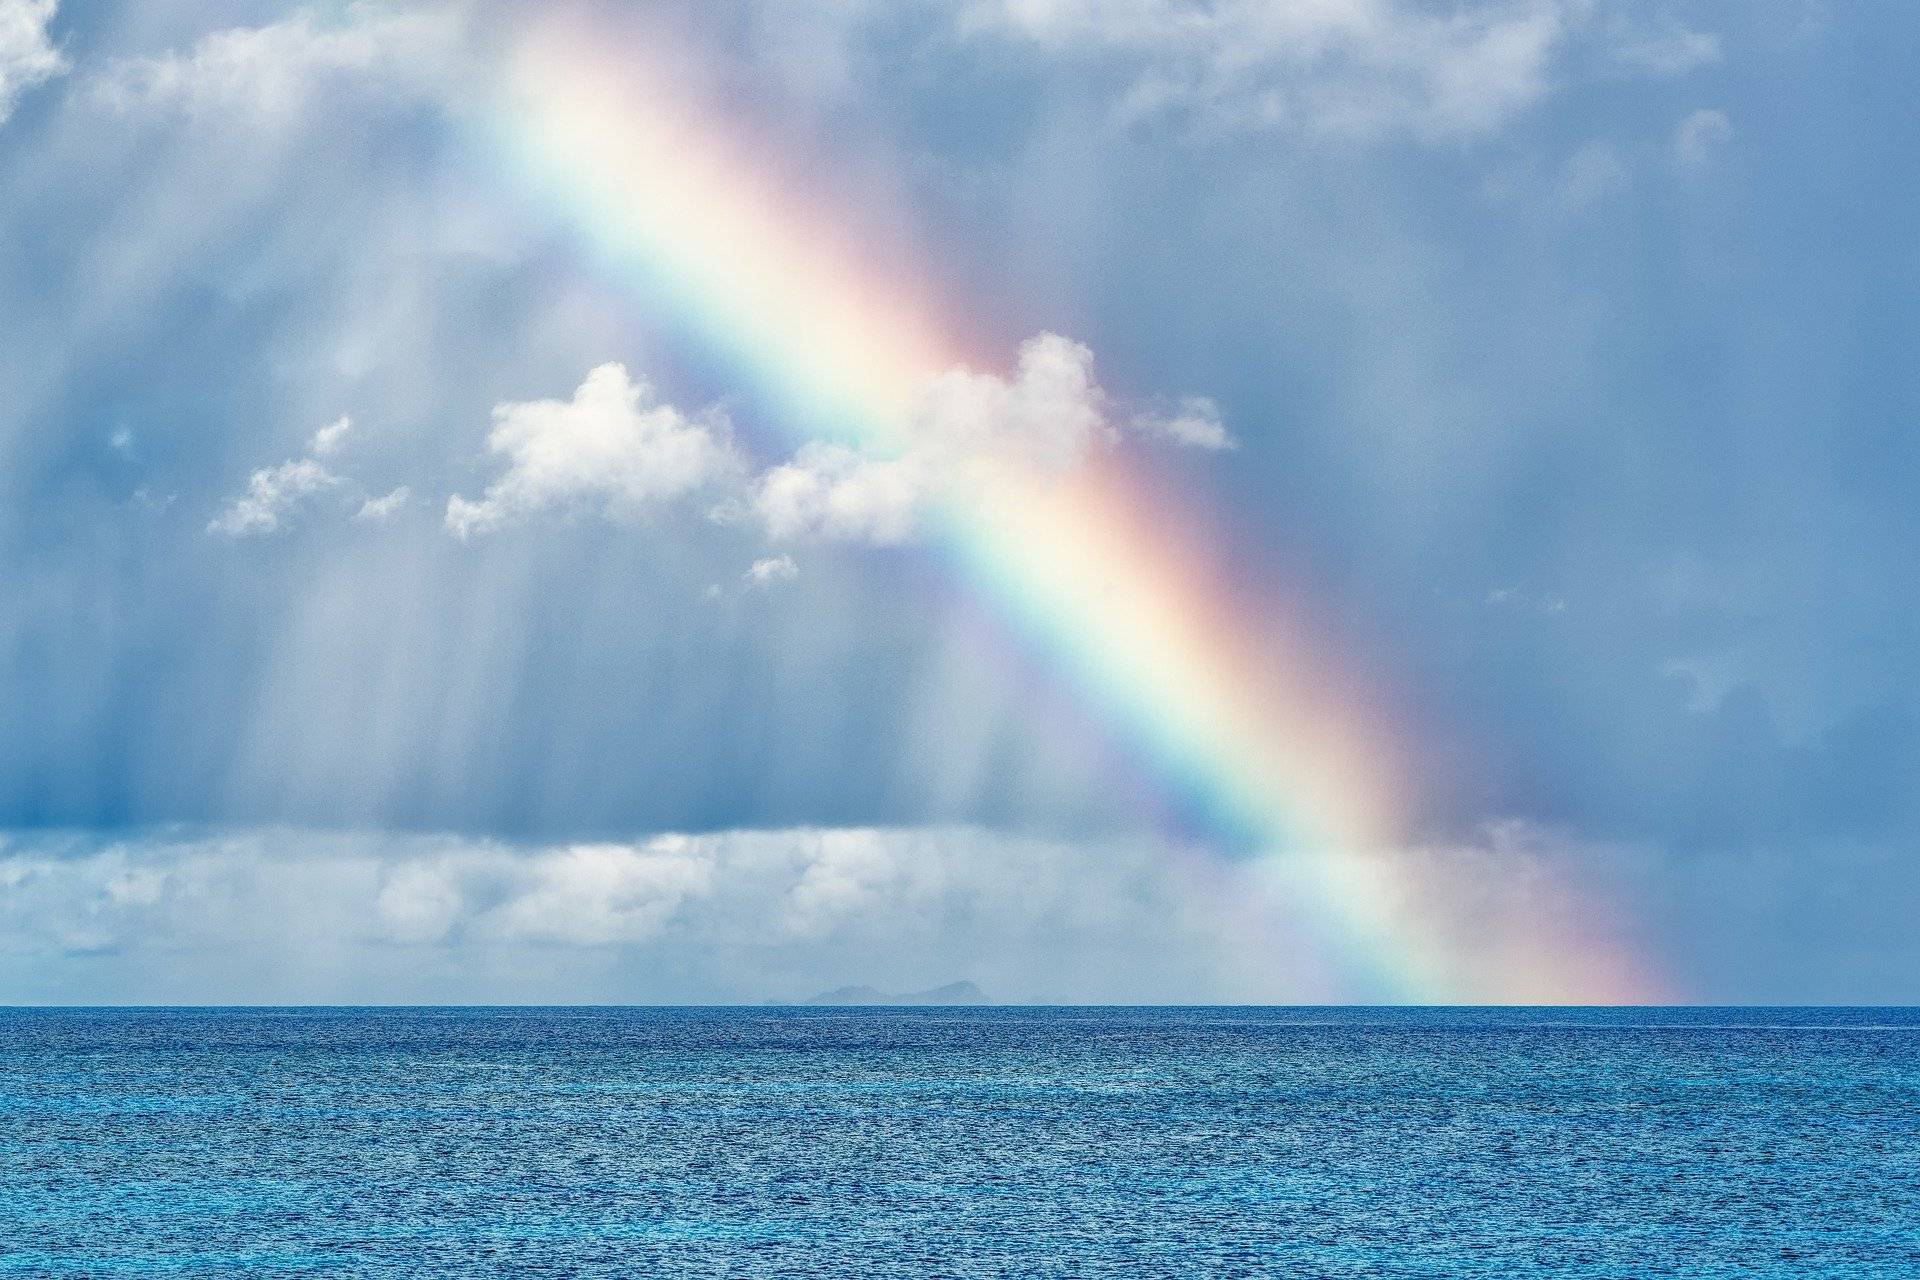p>
<p>EAI6000</p>
<p>Professor Mark Wagy</p>
<p>May 8, 2022</p>

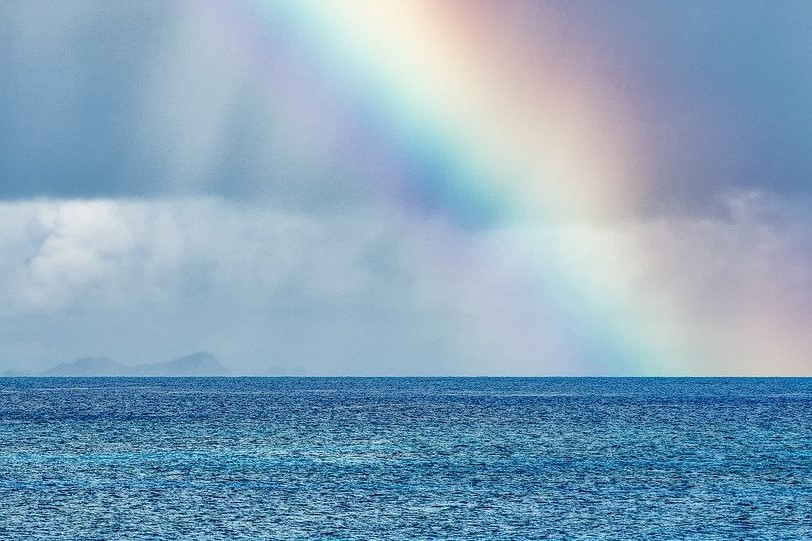

# Weather Model

## Directions

For this project, you will need to implement a filtering  inference task on an HMM. These are described in Section 15.2 of the text.

Denote the hidden states of the HMM by `S(t)` and the observations (evidence) by `E(t)`. In the weather problem from the HMM Tutorial, X(t) would be either sunny, rainy, or foggy, and `E(t)` is yes or no to indicate if an umbrella was observed. We will use this model with prior probabilities P(sunny) = 0.5, P(rainy) = 0.25, P(foggy) = 0.25. The remaining probilities you need are specified below in the emisssion (`P_emission`) and transition matrices (`P_transition`).

## What you need to do

You will need to fill in the missing implementations of the following functions in the code where specified by the comments (`### YOUR CODE HERE ###`) and answer the questions where indicated.

In implementing the code for the filtering task, you will be computing the probability of rain given the observations of the umbrella.

## Probability Definitions
Below you will find:
- `P_init`: The initial probabilities of the weather state, whether sunny (0), rainy (1) or foggy (2) 
- `P_transition`: The transition probabilities or the probability that one weather state one day transitions to another weather state 
- `P_emission`: The 'emission' probabilities or the probabilities that an observation is made, conditioned on the underlying state.

In [ ]:
### DO NOT CHANGE ###

import numpy as np

# prior probability on weather states
# P(sunny) = 0.5  P(rainy) = 0.25  P(foggy) = 0.25
P_init = np.array([0.5, 0.25, 0.25])

# states (0=sunny, 1=rainy, 2=foggy)
S = [0, 1, 2]

# transition probabilities
#                    tomorrrow
#    today     sunny  rainy  foggy
#    sunny      0.8    0.05   0.15
#    rainy      0.2    0.6    0.2 
#    foggy      0.2    0.3    0.5
P_transition = np.array([ [0.8, 0.05, 0.15], [0.2, 0.6, 0.2], [0.2, 0.3, 0.5] ])

# conditional probabilities of evidence (observations) given weather
#                            sunny  rainy  foggy 
# P(weather | umbrella=no)    0.9    0.2    0.7
# P(weather | umbrella=yes)   0.1    0.8    0.3
P_emission = np.array([ [0.9, 0.2, 0.7], [0.1, 0.8, 0.3] ])

### [Question - State Transitions] ###
**If today is sunny what is the most likely forecast for the next two days if you have no umbrella observations to work with?**
Given a sunny day, there is an 80% chance of tomorrow being sunny, and (absent any evidence) another 80% chance of the following day — **at 64% likelihood, this is the most likely forecast.**

In [ ]:
# Defining our probabilities based on what we are given.
p_sunny = P_init[0]
p_sun_to_sun = P_transition[0][0]
p_sun_to_rain = P_transition[0][1]
p_sun_to_fog = P_transition[0][2]
p_rainy = P_init[1]
p_rain_to_rain = P_transition[1][1]
p_rain_to_fog = P_transition[1][0]
p_rain_to_sun = P_transition[1][2]
p_foggy = P_init[2]
p_fog_to_fog = P_transition[2][2]
p_fog_to_rain = P_transition[2][1]
p_fog_to_sun = P_transition[2][0]

In [ ]:
# There is no code requirement for this part, without umbrella observations
# but I figured to be safe I would create a basic function to generate probabilities.
def gen_probability_without_evidence(trans_1, trans_2):
  return round((trans_1 * trans_2) * 100,2)

In [ ]:
sun_2 = gen_probability_without_evidence(p_sun_to_sun, p_sun_to_sun)
rain_2 = gen_probability_without_evidence(p_sun_to_rain, p_rain_to_rain)
fog_2 = gen_probability_without_evidence(p_sun_to_fog, p_fog_to_fog)
sun_rain = gen_probability_without_evidence(p_sun_to_sun, p_sun_to_rain)
sun_fog = gen_probability_without_evidence(p_sun_to_sun, p_sun_to_fog)
rain_sun = gen_probability_without_evidence(p_sun_to_rain, p_rain_to_sun)
rain_fog = gen_probability_without_evidence(p_sun_to_rain, p_rain_to_fog)
fog_sun = gen_probability_without_evidence(p_sun_to_fog, p_fog_to_sun)
fog_rain = gen_probability_without_evidence(p_sun_to_fog, p_fog_to_rain)

In [ ]:
print(f"Sunny Both Days: {sun_2}%")
print(f"Sunny Then Rainy: {sun_rain}%")
print(f"Sunny Then Foggy: {sun_fog}%")
print(f"Rainy Both Days: {rain_2}%")
print(f"Rainy Then Foggy: {rain_fog}%")
print(f"Rainy Then Sunny: {rain_sun}%")
print(f"Foggy Both Days: {fog_2}%")
print(f"Foggy Then Rainy: {fog_rain}%")
print(f"Foggy Then Sunny: {fog_sun}%")

Sunny Both Days: 64.0%
Sunny Then Rainy: 4.0%
Sunny Then Foggy: 12.0%
Rainy Both Days: 3.0%
Rainy Then Foggy: 1.0%
Rainy Then Sunny: 1.0%
Foggy Both Days: 7.5%
Foggy Then Rainy: 4.5%
Foggy Then Sunny: 3.0%


In [ ]:
# Just to be sure that our probabilities add up.
def assert_totality(*args):
  
  assert sum([*args]) == 100
  print("Probabilities sum to 1")

In [ ]:
assert_totality(sun_2, sun_rain, sun_fog, rain_sun, rain_2, rain_fog, fog_2, fog_rain, fog_sun)

Probabilities sum to 1


### [Question - Emission probabilities ]
**If on the first day you see no umbrella, what is the probability that it is rainy, foggy or sunny (Hint: remember the importance of overall probability of each state)?**

What is the most likely weather (hidden state)?

In [ ]:
def gen_emission_probability(arg1, arg2):
  return round(arg1 * arg2,4) * 100

In [ ]:
sun_emission = gen_emission_probability(p_sunny, P_emission[0][0])
rain_emission = gen_emission_probability(p_rainy, P_emission[0][1])
fog_emission = gen_emission_probability(p_foggy, P_emission[0][2])
rain_void = gen_emission_probability(p_rainy, P_emission[1][1])
sun_void = gen_emission_probability(p_sunny, P_emission[1][0])
fog_void = gen_emission_probability(p_foggy, P_emission[1][2])

In [ ]:
P_state_day0_given_umbrella = "sunny"
print("The most likely weather on the first day is ...", P_state_day0_given_umbrella, f"... at {sun_emission}%.")

The most likely weather on the first day is ... sunny ... at 45.0%.


In [ ]:
# For fun (and to ensure accuracy) we'll calculate the other possibilities.

In [ ]:
print("Other Possibilities Given Evidence:")
print(f"Foggy: {fog_emission}%")
print(f"Rainy: {rain_emission}%")
print("\n")
print("Other Possibilites (Not Valid Given Umbrella):")
print(f"Rainy: {rain_void }%")
print(f"Sunny: {sun_void}%")
print(f"Foggy: {fog_void}%")

Other Possibilities Given Evidence:
Foggy: 17.5%
Rainy: 5.0%


Other Possibilites (Not Valid Given Umbrella):
Rainy: 20.0%
Sunny: 5.0%
Foggy: 7.5%


In [ ]:
# Still, we will assert that our arguments add up.
assert_totality(sun_emission, fog_emission, rain_emission, rain_void, sun_void, fog_void)

Probabilities sum to 1


### Evidence / observations

Now we will define the observations on each day - whether we observed an umbrella (1) or not (0). 


In [ ]:
### DO NOT CHANGE ###

## 0 = no umbrella, 1 = umbrella
E = [0, 0, 0, 1, 0, 0, 1, 1, 0, 1]

## Filtering

*As a reminder*

**Filtering**:
Given observation sequence E(0), E(1), ..., E(T-1), compute P(X(T-1)|E(0), ..., E(T-1)).

So we are computing the probability of the final state given our observations or evidence to date.

We do this with the *Forward Algorithm* (see 15.2 in the text), which requires that we initialize probabilities at the first step using our 'prior' probability values of each underlying state. Then we update probabilities at each step (`Recursion`) using the prior step probabilities and given new evidence. We do this until we reach the end and then compute the total probability of each underlying state at the finel step.

### Recursion (and initialization) function definition

In [ ]:
### DO NOT CHANGE ###

# Normalize a probability distribution
def normalize(pdist):
   s = sum(pdist)
   for i in range(0,len(pdist)):
      pdist[i] = pdist[i] / s
   return pdist

DEBUG=True

def init_and_recursion(Obs, S, init_prob, P_emission, P_transition):
  ## a has a "row" for every observation and a "column" for every possible state
  a = np.zeros((len(Obs), len(S)))
  for t in range(0, len(Obs)):
    print(f".. (time {t}) Observation: {Obs[t]}")
    ## probability of a[0,:] is computed by summing over probabilities of all the 
    ## ways we could get to this "path" given where we left off at the previous
    ## time step
    if t == 0:
      ##### Initialization
      for j in range(len(S)):
        #print(f"t={t}, j={j}, S[j]={S[j]}, Obs[t]={Obs[t]}")
        a[t, j] = init_prob[j] * P_emission[Obs[t], S[j]]
        current_state_total_prob = a[t, j]
        print(f".... Probability at state {S[j]}: {current_state_total_prob:.4f} (initial state)")
    else:    
      ## we need to compute a probability for each of the possible states
      for j in range(len(S)): ## for each of the present states
        S_curr = S[j]
        ## we need to sum over all of the previous states to get current state prob
        ## we'll keep track of that probability to sum up here
        current_state_total_prob = 0.0
        for k in range(len(S)): ## for each of the possible previous states
          S_prev = S[k] ## possible previous state that we came from
          if DEBUG:
            print(f"......Transition from state={S_prev} to state={S_prev}")
            print(f"        Calculation: ")
            print(f"        {a[t-1, k]:.2f} * {P_emission[Obs[t], S[j]]:.2f} * {P_transition[S_prev, S_curr]:.2f}")
          current_state_total_prob += a[t-1, k] * P_emission[Obs[t], S[j]] * P_transition[S_prev, S_curr]
        a[t, j] = current_state_total_prob
    a[t,:] = normalize(a[t,:])
    print(f".... State probabilities: {a[t, :]}")
  return a

### Termination function definition

In [ ]:
### DO NOT CHANGE ###

def termination(a):
  total_ending_prob = 0
  T = a.shape[0]-1 ## last time point
  for i in range(len(a[T, :])):
    total_ending_prob += a[T, i]
  print(f"\nProbability of each potential state: {a[T]}")

### [Question - Final state]
What is the most likely final state (most likely weather)? How much more likely is the final weather than the other two options?

Use the above recursion and initialization function to compute the most likely 
state at the end (the filtering problem).

In [206]:
states = init_and_recursion(E, S, P_init, P_emission, P_transition)

.. (time 0) Observation: 0
.... Probability at state 0: 0.4500 (initial state)
.... Probability at state 1: 0.0500 (initial state)
.... Probability at state 2: 0.1750 (initial state)
.... State probabilities: [0.66666667 0.07407407 0.25925926]
.. (time 1) Observation: 0
......Transition from state=0 to state=0
        Calculation: 
        0.67 * 0.90 * 0.80
......Transition from state=1 to state=1
        Calculation: 
        0.07 * 0.90 * 0.20
......Transition from state=2 to state=2
        Calculation: 
        0.26 * 0.90 * 0.20
......Transition from state=0 to state=0
        Calculation: 
        0.67 * 0.20 * 0.05
......Transition from state=1 to state=1
        Calculation: 
        0.07 * 0.20 * 0.60
......Transition from state=2 to state=2
        Calculation: 
        0.26 * 0.20 * 0.30
......Transition from state=0 to state=0
        Calculation: 
        0.67 * 0.70 * 0.15
......Transition from state=1 to state=1
        Calculation: 
        0.07 * 0.70 * 0.20
......Tra

In [207]:
termination(states)


Probability of each potential state: [0.14176559 0.59991196 0.25832245]


**Rainy - at nearly 60% (59.9) it is much greater than foggy at 25.8% and sunny 14.1%**

### [Question - Plot probabilities ]

Use the [PyPlot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#:~:text=the%20pyplot%20interface.-,Intro%20to%20pyplot,the%20plot%20with%20labels%2C%20etc.) library to plot the transition probabilities over time.

In [208]:
import matplotlib.pyplot as plt
from pylab import rcParams

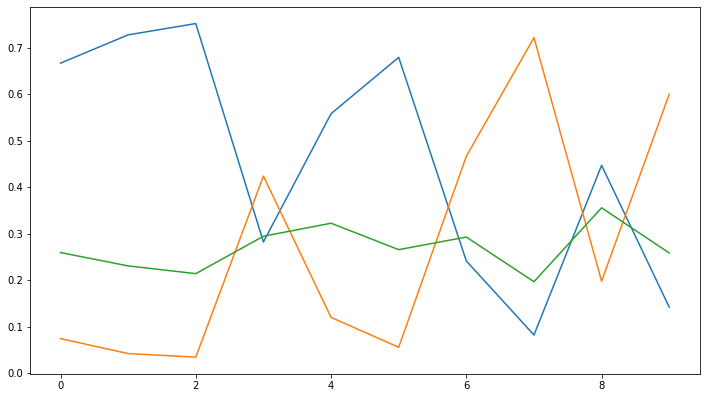

In [209]:
# An initial plot of states.
plt.plot(states)
plt.show()

In [210]:
# Tying each "line" in states to its own variable via generators.
sun_line =  [states[i][0] for i in range(len(states))]
rain_line =  [states[i][1] for i in range(len(states))]
fog_line =  [states[i][2] for i in range(len(states))]

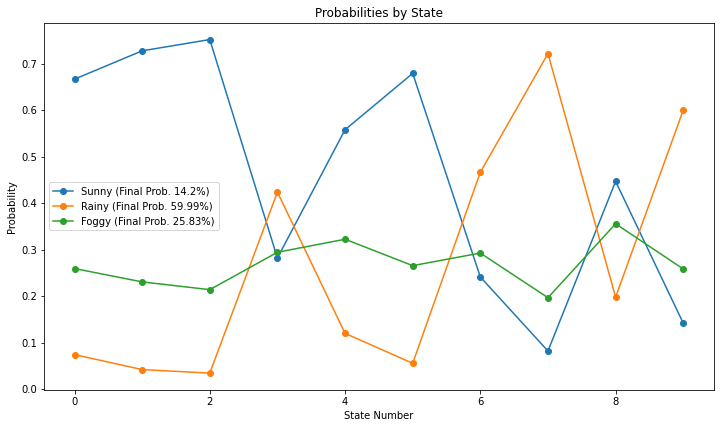

In [212]:
# Want to fit in the legend for easy reading so used rcParams and a custom-placed legend.
rcParams["figure.figsize"] = (12,6.75)
plt.plot(sun_line, label=f"Sunny (Final Prob. {round(sun_line[-1],3) * 100}%)", marker="o")
plt.plot(rain_line, label=f"Rainy (Final Prob. {round(rain_line[-1],4) * 100}%)", marker="o")
plt.plot(fog_line, label=f"Foggy (Final Prob. {round(fog_line[-1],4) * 100}%)", marker="o")
plt.title("Probabilities by State")
plt.xlabel("State Number")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.show()